In [1]:
using Championetal2023, Plots, SparseArrays, StatsBase, Statistics, Random

# Figure 5B

112.031303 seconds (170.59 M allocations: 116.114 GiB, 22.20% gc time)


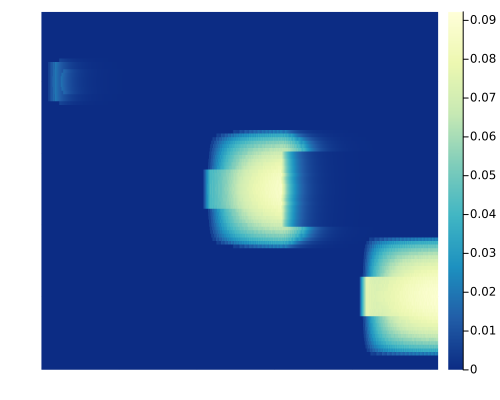

In [14]:
starts = [100, 1100, 2100, 3100, 4100]
pulselocs = hcat(20, 20, 50, 50, 80)  
pulseheights = hcat(0.01, -0.2, 0.05, -0.2, 0.2)
pulsewidths = hcat(10, 20, 10, 20, 10) 
durations = [100,400, 100, 400, 100]

thisdict = Dict([
        ("simtype", :ring), #type of simulation
        ("nnodes", 100), #number of network nodes

        ("g_Na", 35.0), #mS/cm2
        ("g_K", 9.0), #mS/cm2
        ("g_L", 0.5), #mS/cm2
        ("E_Na", 55.0), #mV
        ("phi", 15.0),
        ("E_K", -90.0), #mV
        ("C_m", 0.333), #μF/cm2
        ("E_L", -65.0), #mV
        ("tau_syn", 150.0), #ms
        ("w_EE", 1.0), #mV
        ("spike_threshold", 0.0), # mV

        ("pulsestarts", starts), # ms
        ("pulselocs", pulselocs),
        ("pulseheights", pulseheights), #uA/cm2
        ("pulsewidths", pulsewidths), # integer number of nodes
        ("pulsedurations", durations), # ms

        ("weightoffset_A", -0.024), #uA/cm2
        
        ("weightmult_B", 0.059), #uA/cm2
        ("weight_pimult", 2.0), 

        ("weightssigma", 0.0), 

        ("noisesigma", 0.0), 
        ("tau_n", 500.0), #ms
        ("gammasigma", 0.0), 
        ("tau_n_gamma", 500), #
        ("omegasigma", 0.0), 
        ("tau_n_omega", 500), #

        ("gamma_I_t", -0.0), #uA/cm2
        ("omega_I_t", 0.05), #  #1/ms
        ("g_syn", 1.0), #mS/cm2
        ("I_O", 4.01), #uA/cm2

        ("dt", 0.01),
        ("tmax", 5100),  
        ("downsamplespacing", 100),
        ]
)

@time tvals, sim = oscintegrator_sim(thisdict)


sequenceplot = plot(size = (500, 400)); 
dd=cgrad(:YlGnBu_8, rev=true)
heatmap!(sequenceplot, tvals.plot_t_vect/1000, 1:thisdict["nnodes"], sim.s_mat, yflip=true, c=dd, axis=false)
plot(sequenceplot)


 39.905221 seconds (66.83 M allocations: 45.461 GiB, 26.26% gc time)
 51.445607 seconds (66.83 M allocations: 45.528 GiB, 24.18% gc time)
 45.289202 seconds (66.83 M allocations: 45.532 GiB, 26.05% gc time)
 49.967713 seconds (66.83 M allocations: 45.535 GiB, 25.42% gc time)
 45.972048 seconds (66.83 M allocations: 45.537 GiB, 26.37% gc time)
 48.477510 seconds (66.83 M allocations: 45.539 GiB, 25.97% gc time)
 45.259870 seconds (66.83 M allocations: 45.540 GiB, 26.38% gc time)
 44.652666 seconds (66.83 M allocations: 45.542 GiB, 26.47% gc time)
 45.049101 seconds (66.83 M allocations: 45.543 GiB, 26.27% gc time)
 44.354564 seconds (66.83 M allocations: 45.545 GiB, 26.49% gc time)


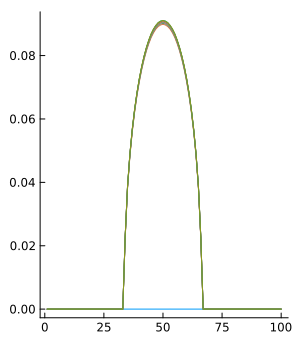

In [43]:
starts = [100] 
durations = [100] 
pulselocs = [50] 
pulsewidths = [10] 
pulseheights = [0.0]
allstrengths = collect(range(0.01, stop=0.5, length=10))


thisdict = Dict([
        ("simtype", :ring), #type of simulation
        ("nnodes", 100), #number of network nodes

        ("g_Na", 35.0), #mS/cm2
        ("g_K", 9.0), #mS/cm2
        ("g_L", 0.5), #mS/cm2
        ("E_Na", 55.0), #mV
        ("phi", 15.0),
        ("E_K", -90.0), #mV
        ("C_m", 0.333), #μF/cm2
        ("E_L", -65.0), #mV
        ("tau_syn", 150.0), #ms
        ("w_EE", 1.0), #mV
        ("spike_threshold", 0.0), # mV

        ("pulsestarts", starts), # ms
        ("pulselocs", pulselocs),
        ("pulseheights", pulseheights), #uA/cm2
        ("pulsewidths", pulsewidths), # integer number of nodes
        ("pulsedurations", durations), # ms

        ("weightoffset_A", -0.024), #uA/cm2
        
        ("weightmult_B", 0.059), #uA/cm2
        ("weight_pimult", 2.0), 

        ("weightssigma", 0.0), 

        ("noisesigma", 0.0), 
        ("tau_n", 500.0), #ms
        ("gammasigma", 0.0), 
        ("tau_n_gamma", 500), #
        ("omegasigma", 0.0), 
        ("tau_n_omega", 500), #

        ("gamma_I_t", -0.0), #uA/cm2
        ("omega_I_t", 0.05), #  #1/ms
        ("g_syn", 1.0), #mS/cm2
        ("I_O", 4.01), #uA/cm2

        ("dt", 0.01),
        ("tmax", 2000),  
        ("downsamplespacing", 100),
        ]
)

netcurve_plot = plot(size=(300, 350), grid=false)
xaxis = collect(1:thisdict["nnodes"])
storage = zeros(thisdict["nnodes"], length(allstrengths))
for (idx, strength) in enumerate(allstrengths)
    thisdict["pulseheights"] = [strength]

    @time tvals, sim = oscintegrator_sim(thisdict)

    tempstorage = zeros(thisdict["nnodes"])
    for i in 1:thisdict["nnodes"]
        midpoint = round(Int64, size(sim.s_mat,2)/2)
        tempstorage[i] = mean(sim.s_mat[i, midpoint:end])
    end

    plot!(netcurve_plot, xaxis, tempstorage, label=false)

    storage[:,idx] = tempstorage
end
plot(netcurve_plot)


# Figure 7C

100.456452 seconds (170.58 M allocations: 116.000 GiB, 23.86% gc time)


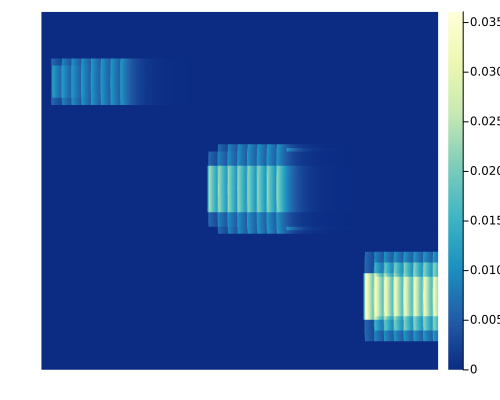

In [31]:
starts = [100, 1100, 2100, 3100, 4100]
pulselocs = hcat(20, 20, 50, 50, 80)  
pulseheights = hcat(0.05, -0.2, 0.12, -0.2, 0.2)
pulsewidths = hcat(12, 20, 12, 20, 12) 
durations = [100, 400, 100, 400, 100]

thisdict = Dict([
        ("simtype", :ring), #type of simulation
        ("nnodes", 100), #number of network nodes

        ("g_Na", 35.0), #mS/cm2
        ("g_K", 9.0), #mS/cm2
        ("g_L", 0.5), #mS/cm2
        ("E_Na", 55.0), #mV
        ("phi", 15.0),
        ("E_K", -90.0), #mV
        ("C_m", 0.333), #μF/cm2
        ("E_L", -65.0), #mV
        ("tau_syn", 150.0), #ms
        ("w_EE", 1.0), #mV
        ("spike_threshold", 0.0), # mV

        ("pulsestarts", starts), # ms
        ("pulselocs", pulselocs),
        ("pulseheights", pulseheights), #uA/cm2
        ("pulsewidths", pulsewidths), # integer number of nodes
        ("pulsedurations", durations), # ms

        ("weightoffset_A", -0.54), 
        ("weightmult_B", 0.909), 
        ("weight_pimult", 2.0), 

        ("weightssigma", 0.0), 

        ("noisesigma", 0.0), 
        ("tau_n", 500.0), #ms
        ("gammasigma", 0.0), 
        ("tau_n_gamma", 500), #
        ("omegasigma", 0.0), 
        ("tau_n_omega", 500), #

        ("gamma_I_t", 0.5), #uA/cm2
        ("omega_I_t", 0.05), #  #1/ms
        ("g_syn", 1.0), #mS/cm2
        ("I_O", 3.515), #uA/cm2

        ("dt", 0.01),
        ("tmax", 5100), 
        ("downsamplespacing", 100),
        ]
)

@time tvals, sim = oscintegrator_sim(thisdict)


sequenceplot = plot(size = (500, 400)); 
dd=cgrad(:YlGnBu_8, rev=true)
heatmap!(sequenceplot, tvals.plot_t_vect/1000, 1:thisdict["nnodes"], sim.s_mat, yflip=true, c=dd, axis=false)
plot(sequenceplot)


 51.088450 seconds (67.55 M allocations: 45.498 GiB, 29.81% gc time, 0.57% compilation time)
 50.380083 seconds (66.83 M allocations: 45.463 GiB, 30.82% gc time)
 50.265001 seconds (66.83 M allocations: 45.465 GiB, 30.73% gc time)
 50.559531 seconds (66.83 M allocations: 45.468 GiB, 30.64% gc time)
 50.934626 seconds (66.83 M allocations: 45.470 GiB, 30.61% gc time)
 50.101499 seconds (66.83 M allocations: 45.475 GiB, 30.63% gc time)
 53.732375 seconds (66.83 M allocations: 45.479 GiB, 29.52% gc time)
 54.094897 seconds (66.83 M allocations: 45.484 GiB, 29.45% gc time)
 55.866419 seconds (66.83 M allocations: 45.488 GiB, 29.37% gc time)
 54.405907 seconds (66.83 M allocations: 45.497 GiB, 29.65% gc time)


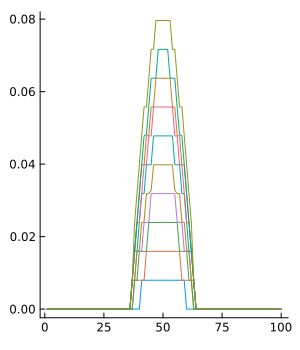

In [23]:
starts = [100] 
durations = [100] 
pulselocs = [50] 
pulsewidths = [20] 
pulseheights = [0.0]
allstrengths = collect(range(0.05, stop=0.5, length=10))
allstrengths[7] = 0.34

thisdict = Dict([
        ("simtype", :ring), #type of simulation
        ("nnodes", 100), #number of network nodes

        ("g_Na", 35.0), #mS/cm2
        ("g_K", 9.0), #mS/cm2
        ("g_L", 0.5), #mS/cm2
        ("E_Na", 55.0), #mV
        ("phi", 15.0),
        ("E_K", -90.0), #mV
        ("C_m", 0.333), #μF/cm2
        ("E_L", -65.0), #mV
        ("tau_syn", 150.0), #ms
        ("w_EE", 1.0), #mV
        ("spike_threshold", 0.0), # mV

        ("pulsestarts", starts), # ms
        ("pulselocs", pulselocs),
        ("pulseheights", pulseheights), #uA/cm2
        ("pulsewidths", pulsewidths), # integer number of nodes
        ("pulsedurations", durations), # ms

        ("weightoffset_A", -0.54), 
        ("weightmult_B", 0.909), 
        ("weight_pimult", 2.0), 

        ("weightssigma", 0.0), 

        ("noisesigma", 0.0), 
        ("tau_n", 500.0), #ms
        ("gammasigma", 0.0), 
        ("tau_n_gamma", 500), #
        ("omegasigma", 0.0), 
        ("tau_n_omega", 500), #

        ("gamma_I_t", 0.5), #uA/cm2
        ("omega_I_t", 0.05), #  #1/ms
        ("g_syn", 1.0), #mS/cm2
        ("I_O", 3.515), #uA/cm2

        ("dt", 0.01),
        ("tmax", 2000), 
        ("downsamplespacing", 100),
        ]
)

netcurve_plot = plot(size=(300, 350), grid=false)
xaxis = collect(1:thisdict["nnodes"])
storage = zeros(thisdict["nnodes"], length(allstrengths))
for (idx, strength) in enumerate(allstrengths)
    thisdict["pulseheights"] = [strength]

    @time tvals, sim = oscintegrator_sim(thisdict)

    tempstorage = zeros(thisdict["nnodes"])
    for i in 1:thisdict["nnodes"]
        midpoint = round(Int64, size(sim.s_mat,2)/2)
        tempstorage[i] = mean(sim.s_mat[i, midpoint:end])
    end

    plot!(netcurve_plot, xaxis, tempstorage, label=false)

    storage[:,idx] = tempstorage
end
plot(netcurve_plot)


# Figure 7D

 99.511380 seconds (170.44 M allocations: 115.957 GiB, 19.46% gc time)


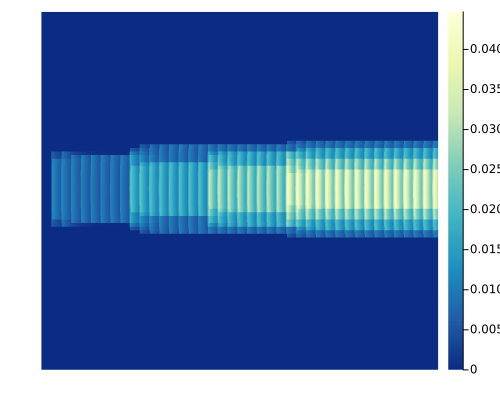

In [24]:
starts = [100, 1100, 2100, 3100]
pulselocs = hcat(50, 50, 50, 50)  
pulseheights = hcat(0.05, 0.05, 0.05, 0.05)
pulsewidths = hcat(20, 20, 20, 20) 
durations = [100, 100, 100, 100]

thisdict = Dict([
        ("simtype", :ring), #type of simulation
        ("nnodes", 100), #number of network nodes

        ("g_Na", 35.0), #mS/cm2
        ("g_K", 9.0), #mS/cm2
        ("g_L", 0.5), #mS/cm2
        ("E_Na", 55.0), #mV
        ("phi", 15.0),
        ("E_K", -90.0), #mV
        ("C_m", 0.333), #μF/cm2
        ("E_L", -65.0), #mV
        ("tau_syn", 150.0), #ms
        ("w_EE", 1.0), #mV
        ("spike_threshold", 0.0), # mV

        ("pulsestarts", starts), # ms
        ("pulselocs", pulselocs),
        ("pulseheights", pulseheights), #uA/cm2
        ("pulsewidths", pulsewidths), # integer number of nodes
        ("pulsedurations", durations), # ms

        ("weightoffset_A", -0.54), 
        ("weightmult_B", 0.909), 
        ("weight_pimult", 2.0), 

        ("weightssigma", 0.0), 

        ("noisesigma", 0.0), 
        ("tau_n", 500.0), #ms
        ("gammasigma", 0.0), 
        ("tau_n_gamma", 500), #
        ("omegasigma", 0.0), 
        ("tau_n_omega", 500), #

        ("gamma_I_t", 0.5), #uA/cm2
        ("omega_I_t", 0.05), #  #1/ms
        ("g_syn", 1.0), #mS/cm2
        ("I_O", 3.515), #uA/cm2

        ("dt", 0.01),
        ("tmax", 5100), 
        ("downsamplespacing", 100),
        ]
)

@time tvals, sim = oscintegrator_sim(thisdict)


sequenceplot = plot(size = (500, 400)); 
dd=cgrad(:YlGnBu_8, rev=true)
heatmap!(sequenceplot, tvals.plot_t_vect/1000, 1:thisdict["nnodes"], sim.s_mat, yflip=true, c=dd, axis=false)
plot(sequenceplot)
